In [357]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [358]:
def grid(a,T,N,M): # построение сетки
    h,tau = a/N,T/M
    x_p = np.array([i*h for i in range(N+1)])
    t_p = np.array([i*tau for i in range(N+1)])
    return x_p, t_p

In [359]:
def conditions(u,a,x,t,kappa): #построение уравнение по решению u(x,t)
    f = sym.diff(u,t,1)-kappa*sym.diff(u,x,2)
    mu = u.subs(t,0)
    mu_1 = u.subs(x,0)
    mu_2 = u.subs(x,a)
    return f, mu, mu_1, mu_2

In [360]:
def explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2):  # Явная схема
    x_p, t_p = grid(a,T,N,M)
    u_p = np.zeros([N+1,M+1],dtype=float)
    h, tau = a/N,T/M
    for k in range(1, M+1):
        for i in range(0, N+1):
            u_p[i,0] = mu.subs(x, x_p[i])
        for i in range(1, N):
            u_p[i,k] = tau*kappa*(u_p[i+1,k-1]-2*u_p[i,k-1]+u_p[i-1,k-1])/(h**2)+\
                        tau*f.subs([(x,x_p[i]),(t,t_p[k-1])])+u_p[i,k-1]
        u_p[0,k] = mu_1.subs(t,t_p[k])
        u_p[N,k] = mu_2.subs(t,t_p[k])
    X, T = np.meshgrid(x_p, t_p, indexing='ij')
    return X, T, u_p

In [378]:
def implicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2):  # Неявная схема
    x_p, t_p = grid(a,T,N,M)
    u_p = np.zeros((N+1,M+1),dtype=float)
    A,C = [np.zeros(N + 1, dtype=float) for _ in range(2)]
    B = np.ones(N+1,dtype=float)
    D = np.zeros(N + 1, dtype=sym.Symbol)
    h,tau = a/N,T/M
    for k in range(1, M + 1):
        D[0] = mu_1.subs(t, t_p[k])
        D[N] = mu_2.subs(t, t_p[k])
        for i in range(0,N+1):
            u_p[i,0] = mu.subs(x, x_p[i])
        for i in range(1, N):
            A[i] = kappa/h**2
            B[i] = -2*kappa/h**2-1/tau
            C[i] = kappa/h**2
            D[i] = -u_p[i,k-1]/tau-f.subs([(x, x_p[i]),(t, t_p[k])])
        s = np.zeros(N+1, dtype=float)
        t1 = np.zeros(N+1, dtype=float)
        s[0] = -C[0]/B[0]
        t1[0] = D[0]/B[0]
        for i in range(1, N + 1):
            s[i] = -C[i]/(A[i]*s[i-1]+B[i])
            t1[i] = (D[i]-A[i]*t1[i-1])/(A[i]*s[i-1]+B[i])
        u_p[N,k] = t1[N]
        for i in range(N - 1, -1, -1):
            u_p[i,k] = s[i]*u_p[i+1,k]+t1[i]
    X, T = np.meshgrid(x_p, t_p, indexing='ij')
    return X, T, u_p

In [382]:
x = sym.symbols('x')
t = sym.symbols('t')

funs = [x**2/4+t**2/4,
        t*x, 
        x*t**3-2*x+25-x**5] #функции для проверки

a, T = 10,10 #границы отрезков - одинаковы для всех задач
N,M = 100,100 #количество элементов на сетках 

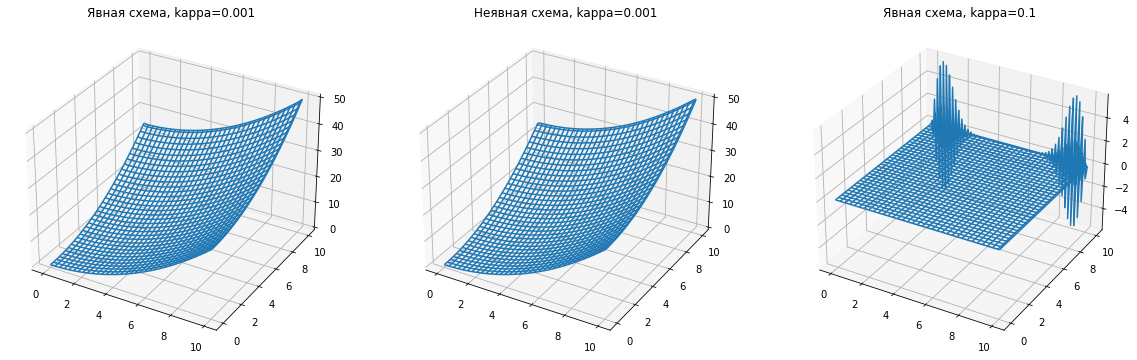

In [387]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Явная схема, kappa=0.001')
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Неявная схема, kappa=0.001')
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Явная схема, kappa=0.1')

kappa = 0.001
f, mu, mu_1, mu_2 = conditions(funs[0], a, x, t, kappa)

x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax1.plot_wireframe(x_coord, t_coord, res)

x_coord, t_coord, res = implicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax2.plot_wireframe(x_coord, t_coord, res)

kappa = 0.1
x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax3.plot_wireframe(x_coord, t_coord, res)

plt.show()
fig.savefig("Lab9_graph1")

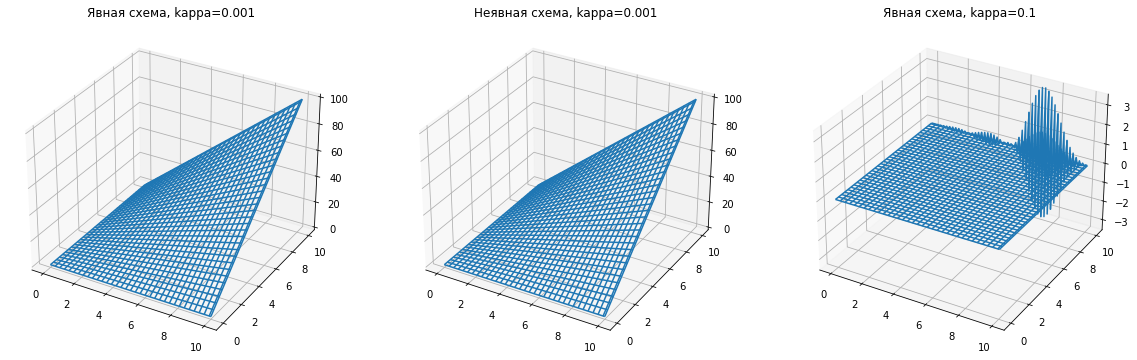

In [388]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Явная схема, kappa=0.001')
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Неявная схема, kappa=0.001')
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Явная схема, kappa=0.1')

kappa = 0.001
f, mu, mu_1, mu_2 = conditions(funs[1], a, x, t, kappa)

x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax1.plot_wireframe(x_coord, t_coord, res)

x_coord, t_coord, res = implicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax2.plot_wireframe(x_coord, t_coord, res)

kappa = 0.1
x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax3.plot_wireframe(x_coord, t_coord, res)

plt.show()
fig.savefig("Lab9_graph2")

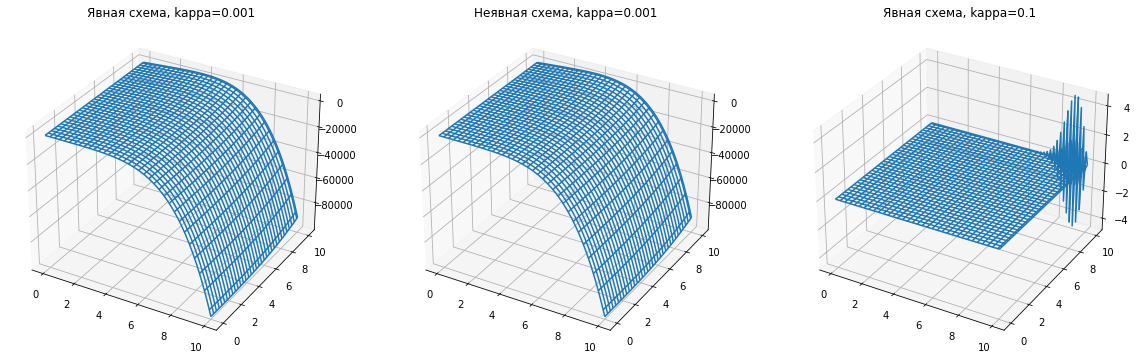

In [389]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Явная схема, kappa=0.001')
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Неявная схема, kappa=0.001')
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Явная схема, kappa=0.1')

kappa = 0.001
f, mu, mu_1, mu_2 = conditions(funs[2], a, x, t, kappa)

x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax1.plot_wireframe(x_coord, t_coord, res)

x_coord, t_coord, res = implicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax2.plot_wireframe(x_coord, t_coord, res)

kappa = 0.1
x_coord, t_coord, res = explicit_scheme(a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
ax3.plot_wireframe(x_coord, t_coord, res)

plt.show()
fig.savefig("Lab9_graph3")